In [1]:
!pip install requests
!pip install bs4
import requests
from bs4 import BeautifulSoup as bs

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CASE STUDY

# Extracting data by web scraping NYKAA website, analyzing best category and products of it and visualizing by plotting them using python.

In [3]:
url="https://www.nykaa.com/skin/c/8377"

In [4]:
response=requests.get(url)
response.status_cod

200

In [5]:
content=response.text
len(content)

494674

In [6]:
soup=bs(content,"html.parser")

In [29]:
soup.text

"Buy Skincare Products Online With Discounts Upto 70% And Abovecategoriesbrands*#PopularLuxeOnly At NykaaNew Launchesnykaa fashionbeauty adviceSign inHome❯SkinBuy Skincare Online\xa0(14215)All ProductsSort By : popularityBrandPriceCategoryDiscountConcernSkin typeFormulationSPFAvg Customer RatingPreferenceCountry Of OriginGenderIngredientBenefitsConsciousUsage PeriodFEATUREDNeutrogena Hydro Boost Hyaluronic Acid Water Gel Light Face ...MRP:₹1190₹107110% Off( 63762 )Heart iconAdd to BagFEATUREDBESTSELLERCeraVe Moisturizer For Dry Skin with Ceramides, Niacinamide ...MRP:₹430₹38710% Off( 19121 )2 sizesHeart iconPreview SizeFEATUREDDot & Key Mango Detan Oil-Free Sunscreen Gel SPF 50+ PA+++ W...MRP:₹445₹38713% Off( 375 )2 sizesHeart iconPreview SizeFEATUREDForest Essentials Delicate Facial Cleanser - Kashmiri Saffro...MRP:₹1295Enjoy Complimentary Gift( 9934 )2 sizesHeart iconPreview SizeFEATUREDBESTSELLEREucerin Anti-Pigment Dual Serum With Thiamidol & Hyaluronic ...MRP:₹3780( 137 )Heart ico

# Extracting Data

In [7]:
import re
nametags=soup.find_all('div',{'class':'css-xrzmfa'})
for name in nametags:
    print(name.text)

Neutrogena Hydro Boost Hyaluronic Acid Water Gel Light Face ...
CeraVe Moisturizer For Dry Skin with Ceramides, Niacinamide ...
Dot & Key Mango Detan Oil-Free Sunscreen Gel SPF 50+ PA+++ W...
Forest Essentials Delicate Facial Cleanser - Kashmiri Saffro...
Eucerin Anti-Pigment Dual Serum With Thiamidol & Hyaluronic ...
SKIN1004 Madagascar Centella Tone Brightening Capsule Serum
The Ordinary Niacinamide 10% + Zinc 1%
Estee Lauder Advanced Night Repair Synchronized Multi-Recove...
O3+ D -TAN Face Pack for Tan Removal & Glowing Skin - Detan ...
Anua Niacinamide 10 Txa 4 Serum, Brightening Korean Serum Fo...
Cetaphil Gentle Skin Cleanser
The Ordinary Glycolic Acid 7% Exfoliating Solution
Simple Kind To Skin Refreshing Facial Wash
d'you Hustle Serum With 5% Niacinamide, Hyaluronic Acid, Vit...
Dot & Key Vitamin C + E Face Sunscreen SPF 50 PA+++ For Glow...
COSRX Advanced Snail 96 Mucin Power Essence
Dot & Key Strawberry Dew Tinted Sunscreen SPF 50+ PA++++
CeraVe Foaming Cleanser Face Wash Fo

In [8]:
originalprice =soup.find_all('span',{'class':'css-17x46n5'})
for price in originalprice:
    print(price.text)

MRP:₹1190
MRP:₹430
MRP:₹445
MRP:
MRP:₹3780
MRP:₹999
MRP:
MRP:
MRP:
MRP:₹2000
MRP:₹429
MRP:
MRP:₹420
MRP:
MRP:₹445
MRP:
MRP:₹549
MRP:₹520
MRP:₹545
MRP:₹445


In [9]:
offerprice=soup.find_all('span',{'class':'css-111z9ua'})
for offerp in offerprice:
    print(offerp.text)

₹1071
₹387
₹387
₹1295
₹3213
₹899
₹600
₹4500
₹1550
₹1800
₹399
₹1275
₹378
₹3200
₹387
₹1450
₹489
₹468
₹474
₹387


In [10]:
discount =soup.find_all('span',{'class':'css-cjd9an'})
for dis in discount:
    print(dis.text)

10% Off
10% Off
13% Off
15% Off
10% Off
10% Off
7% Off
10% Off
13% Off
11% Off
10% Off
13% Off
13% Off


In [11]:
offer =soup.find_all('ul',{'class':"css-ycjyr6"})
for o in offer:
    print(o.text)

FEATURED
FEATUREDBESTSELLER
FEATURED
FEATURED
FEATUREDBESTSELLER
FEATUREDBESTSELLER
FEATUREDBESTSELLER
FEATUREDBESTSELLER
FEATUREDBESTSELLER
ADBESTSELLER
BESTSELLER
BESTSELLER
BESTSELLER
AD
BESTSELLER
BESTSELLER
BESTSELLER
ADBESTSELLER
BESTSELLER
BESTSELLER


In [12]:
ratings =soup.find_all('span',{'class':"css-1qbvrhp"})
for r in ratings:
    print(r.text)

( 63781 )
( 19131 )
( 381 )
( 9937 )
( 137 )
( 523 )
( 75775 )
( 19862 )
( 19374 )
( 84 )
( 185574 )
( 32740 )
( 85641 )
( 468 )
( 59498 )
( 57892 )
( 6580 )
( 9112 )
( 6663 )
( 39394 )


In [13]:
productDetails = []
for name,op,ofp,d,o,r in zip(nametags,originalprice,offerprice,discount,offer,ratings):
    productDetails.append({'Product Name' : name.text,
                            'Origional Prize' : op.text,
                            'Offer Prize' : ofp.text,
                            'Discount':d.text,
                            'Reviews' : r.text,
                            'Offer' : o.text})

In [14]:
productDetails[:4]

[{'Product Name': 'Neutrogena Hydro Boost Hyaluronic Acid Water Gel Light Face ...',
  'Origional Prize': 'MRP:₹1190',
  'Offer Prize': '₹1071',
  'Discount': '10% Off',
  'Reviews': '( 63781 )',
  'Offer': 'FEATURED'},
 {'Product Name': 'CeraVe Moisturizer For Dry Skin with Ceramides, Niacinamide ...',
  'Origional Prize': 'MRP:₹430',
  'Offer Prize': '₹387',
  'Discount': '10% Off',
  'Reviews': '( 19131 )',
  'Offer': 'FEATUREDBESTSELLER'},
 {'Product Name': 'Dot & Key Mango Detan Oil-Free Sunscreen Gel SPF 50+ PA+++ W...',
  'Origional Prize': 'MRP:₹445',
  'Offer Prize': '₹387',
  'Discount': '13% Off',
  'Reviews': '( 381 )',
  'Offer': 'FEATURED'},
 {'Product Name': 'Forest Essentials Delicate Facial Cleanser - Kashmiri Saffro...',
  'Origional Prize': 'MRP:',
  'Offer Prize': '₹1295',
  'Discount': '15% Off',
  'Reviews': '( 9937 )',
  'Offer': 'FEATURED'}]

In [15]:
df = pd.DataFrame(productDetails,columns=['Product Name','Origional Prize','Offer Prize',
                                          'Discount','Reviews','Offer'])
df

,Product Name,Origional Prize,Offer Prize,Discount,Reviews,Offer
0,Neutrogena Hydro Boost Hyaluronic Acid Water G...,MRP:₹1190,₹1071,10% Off,( 63781 ),FEATURED
1,CeraVe Moisturizer For Dry Skin with Ceramides...,MRP:₹430,₹387,10% Off,( 19131 ),FEATUREDBESTSELLER
2,Dot & Key Mango Detan Oil-Free Sunscreen Gel S...,MRP:₹445,₹387,13% Off,( 381 ),FEATURED
3,Forest Essentials Delicate Facial Cleanser - K...,MRP:,₹1295,15% Off,( 9937 ),FEATURED
4,Eucerin Anti-Pigment Dual Serum With Thiamidol...,MRP:₹3780,₹3213,10% Off,( 137 ),FEATUREDBESTSELLER
5,SKIN1004 Madagascar Centella Tone Brightening ...,MRP:₹999,₹899,10% Off,( 523 ),FEATUREDBESTSELLER
6,The Ordinary Niacinamide 10% + Zinc 1%,MRP:,₹600,7% Off,( 75775 ),FEATUREDBESTSELLER
7,Estee Lauder Advanced Night Repair Synchronize...,MRP:,₹4500,10% Off,( 19862 ),FEATUREDBESTSELLER
8,O3+ D -TAN Face Pack for Tan Removal & Glowing...,MRP:,₹1550,13% Off,( 19374 ),FEATUREDBESTSELLER
9,"Anua Niacinamide 10 Txa 4 Serum, Brightening K...",MRP:₹2000,₹1800,11% Off,( 84 ),ADBESTSELLER


# CREATING DATA FRAME

In [16]:
def get_page_contents(url): 
    response= requests.get(url)
    if response.status_code==200:
        soup= bs(response.text,'html.parser')
        return soup

In [17]:
def get_productname(doc):  
    productname = []
    for name in doc.find_all('div',{'class':'css-xrzmfa'}):
        productname.append(name.text)
    return productname

In [18]:
def get_productprice(doc):
    orgprice = []  
    divs = doc.find_all('div', class_='css-1d0jf8e')
    for div in divs:
        span = div.find('span', class_='css-17x46n5')  
        if span:
            text = span.text.strip()    
            if text == 'MRP:':
                orgprice.append(None)
            else:
                orgprice.append(text)
    return orgprice

In [19]:
def get_offer_price(doc):
    offerprice = []  
    spans = doc.find_all('span', {'class': 'css-111z9ua'})
    for span in spans:
        if span:  
            offerprice.append(span.text)
        else:
            offerprice.append(None) 
    return offerprice


In [31]:
def get_offer_tags(doc):
    offer_tags = []
    offers = doc.find_all('ul', {'class': 'css-ycjyr6'})
    
    for offer in offers:
        text = offer.text.strip()
        if text == 'FEATUREDBESTSELLER':
            text = ' & '.join(text.split('BESTSELLER')) + 'BESTSELLER'
            offer_tags.append(text)
        elif text=="ADNEW":
            text = ' & '.join(text.split('NEW')) + 'NEW'
            offer_tags.append(text)
        elif text=="AD":
            offer_tags.append(text)
        elif text=="NEW":
            offer_tags.append(text)
        elif text=="FEATURED":
            offer_tags.append(text)
        else:
            offer_tags.append(None)
    
    return offer_tags


In [21]:
def getoffer(doc):
    offer = [] 
    divs = doc.find_all('div', class_="css-1d0jf8e")
    for div in divs:
        span = div.find('span', class_="css-cjd9an")

        if span:
            offer.append(span.text.strip())
        else:
            offer.append(None)

    return offer


In [22]:
def getreview(doc):
    review = []
    spans = doc.find_all('span', {'class': 'css-1qbvrhp'})
    for span in spans:
        if span:
            review.append(span.text.strip())
        else:
            review.append(None)
    return review

In [23]:
def dictionary(productname,orgprice,offerprice,freegift,offer,ratings):
    d = []
    for productname,origionalprice,offerprice,freegift,offer,review in zip(productname,orgprice,offerprice,freegift,offer,ratings):
        d.append({'Product Name':productname,
                  'Origional Price':origionalprice,
                  'Offer Price':offerprice,
                  'Offer_Tags':freegift,
                  'Offer':offer,
                  'Reviews':review})
    return d

In [24]:
def create_df(*args):
    return pd.DataFrame(*args)

In [32]:
baseurl = 'https://www.nykaa.com/skin/c/8377?page_no='
finaldict = []
for i in range(1,31):
    doc = get_page_contents(baseurl+str(i))
    productname = get_productname(doc)
    orgprice = get_productprice(doc)
    offerprice = get_offer_price(doc)
    offer_tags = get_offer_tags(doc)
    offer = getoffer(doc)
    review = getreview(doc) 
    finaldict += dictionary(productname,orgprice,offerprice,offer_tags,offer,review) 
df = create_df(finaldict)

In [33]:
df.head()

,Product Name,Origional Price,Offer Price,Offer_Tags,Offer,Reviews
0,Neutrogena Hydro Boost Hyaluronic Acid Water G...,MRP:₹1190,₹1071,FEATURED,10% Off,( 63781 )
1,CeraVe Moisturizer For Dry Skin with Ceramides...,MRP:₹430,₹387,FEATURED & BESTSELLER,10% Off,( 19131 )
2,Dot & Key Mango Detan Oil-Free Sunscreen Gel S...,MRP:₹445,₹387,FEATURED,13% Off,( 381 )
3,Forest Essentials Delicate Facial Cleanser - K...,None,₹1295,FEATURED,None,( 9937 )
4,Eucerin Anti-Pigment Dual Serum With Thiamidol...,MRP:₹3780,₹3213,FEATURED & BESTSELLER,15% Off,( 137 )


#  Exporting it  into .csv format 

In [58]:
df.to_csv('NYKAA.csv', index=False)

# Reading CSV File 

In [2]:
import pandas as pd
df=pd.read_csv("NYKAA.csv")

In [34]:
df

,Product Name,Origional Price,Offer Price,Offer_Tags,Offer,Reviews
0,Neutrogena Hydro Boost Hyaluronic Acid Water G...,MRP:₹1190,₹1071,FEATURED,10% Off,( 63781 )
1,CeraVe Moisturizer For Dry Skin with Ceramides...,MRP:₹430,₹387,FEATURED & BESTSELLER,10% Off,( 19131 )
2,Dot & Key Mango Detan Oil-Free Sunscreen Gel S...,MRP:₹445,₹387,FEATURED,13% Off,( 381 )
3,Forest Essentials Delicate Facial Cleanser - K...,None,₹1295,FEATURED,None,( 9937 )
4,Eucerin Anti-Pigment Dual Serum With Thiamidol...,MRP:₹3780,₹3213,FEATURED & BESTSELLER,15% Off,( 137 )
...,...,...,...,...,...,...
595,Bronson Professional Pore Cleanser Blackhead D...,MRP:₹1000,₹500,None,50% Off,( 4902 )
596,Minimalist SPF 60 PA ++++ Sunscreen - Pregnanc...,MRP:₹599,₹569,None,5% Off,( 8249 )
597,NIVEA SPF 50+ PA+++ & Vit E Face Sunscreen- In...,MRP:₹899,₹674,None,25% Off,( 11394 )
598,Anua Rice 70 Glow Milky Toner with Niacinamide...,MRP:₹1900,₹1710,NEW,10% Off,( 7 )


# CLEANING THE DATA

In [3]:
df.shape

(600, 6)

In [38]:
df['Reviews'] = df['Reviews'].str.replace('\(|\)','',regex=True)
df['Offer Price'] = df['Offer Price'].str.replace('\₹','',regex=True)
df['Origional Price'] = df['Origional Price'].str.replace('MRP:₹','',regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
C:\Users\malat\AppData\Local\Temp\ipykernel_12404\776757415.py:1: SyntaxWarning: invalid escape sequence '\('
  df['Reviews'] = df['Reviews'].str.replace('\(|\)','',regex=True)


In [39]:
df[['Origional Price','Offer Price','Reviews']] = df[['Origional Price','Offer Price','Reviews']].apply(pd.to_numeric)
df.head()

,Product Name,Origional Price,Offer Price,Offer_Tags,Offer,Reviews
0,Neutrogena Hydro Boost Hyaluronic Acid Water G...,1190.0,1071,FEATURED,10% Off,63781
1,CeraVe Moisturizer For Dry Skin with Ceramides...,430.0,387,FEATURED & BESTSELLER,10% Off,19131
2,Dot & Key Mango Detan Oil-Free Sunscreen Gel S...,445.0,387,FEATURED,13% Off,381
3,Forest Essentials Delicate Facial Cleanser - K...,NaN,1295,FEATURED,None,9937
4,Eucerin Anti-Pigment Dual Serum With Thiamidol...,3780.0,3213,FEATURED & BESTSELLER,15% Off,137


In [40]:
df.shape

(600, 6)

In [41]:
df.isnull().sum()

Product Name         0
Origional Price    124
Offer Price          0
Offer_Tags         532
Offer              124
Reviews              0
dtype: int64

In [5]:
df['Offer'] = df['Offer'].fillna('0% Off')
df['Offer_Tags'] = df['Offer_Tags'].fillna('GENERAL')
df['Origional Price'] = df['Origional Price'].fillna(df['Offer Price'])

In [6]:
df.head()

,Product Name,Origional Price,Offer Price,Offer_Tags,Offer,Reviews
0,Neutrogena Hydro Boost Hyaluronic Acid Water G...,1190.0,1071,FEATURED,10% Off,63781
1,CeraVe Moisturizer For Dry Skin with Ceramides...,430.0,387,FEATURED & BESTSELLER,10% Off,19131
2,Dot & Key Mango Detan Oil-Free Sunscreen Gel S...,445.0,387,FEATURED,13% Off,381
3,Forest Essentials Delicate Facial Cleanser - K...,1295.0,1295,FEATURED,0% Off,9937
4,Eucerin Anti-Pigment Dual Serum With Thiamidol...,3780.0,3213,FEATURED & BESTSELLER,15% Off,137


In [7]:
df.tail()

,Product Name,Origional Price,Offer Price,Offer_Tags,Offer,Reviews
595,Bronson Professional Pore Cleanser Blackhead D...,1000.0,500,GENERAL,50% Off,4902
596,Minimalist SPF 60 PA ++++ Sunscreen - Pregnanc...,599.0,569,GENERAL,5% Off,8249
597,NIVEA SPF 50+ PA+++ & Vit E Face Sunscreen- In...,899.0,674,GENERAL,25% Off,11394
598,Anua Rice 70 Glow Milky Toner with Niacinamide...,1900.0,1710,NEW,10% Off,7
599,Maybelline New York Baby Lips Color Balm,209.0,188,GENERAL,10% Off,23937


In [8]:
df.isnull().sum()

Product Name       0
Origional Price    0
Offer Price        0
Offer_Tags         0
Offer              0
Reviews            0
dtype: int64

In [9]:
data=df.select_dtypes(include=['number'])

# DATA ANALYSIS and VISUALIZATION

###### df[['Origional Price','Offer Price']].plot(kind='bar')

<Axes: >

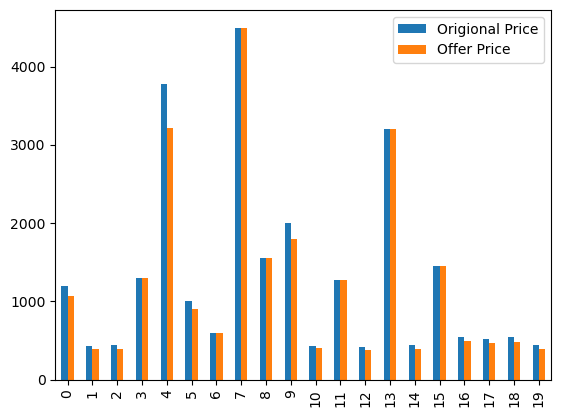

In [3]:
df[['Origional Price','Offer Price']][:20].plot(kind='bar')

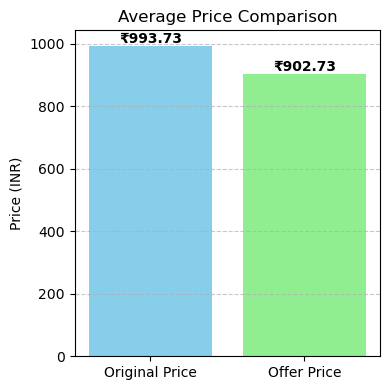

In [6]:
import matplotlib.pyplot as plt

# Calculate averages
avg_offer_price = df['Offer Price'].mean()
avg_original_price = df['Origional Price'].mean()

# Create bar chart
plt.figure(figsize=(4, 4))
plt.bar(['Original Price', 'Offer Price'], [avg_original_price, avg_offer_price], color=['skyblue', 'lightgreen'])

# Add title and labels
plt.title('Average Price Comparison')
plt.ylabel('Price (INR)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display values on top of bars
for index, value in enumerate([avg_original_price, avg_offer_price]):
    plt.text(index, value + 10, f'₹{value:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


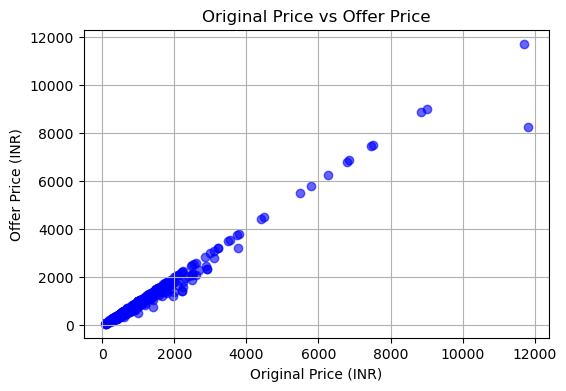

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df['Origional Price'], df['Offer Price'], alpha=0.6, c='blue')
plt.title('Original Price vs Offer Price')
plt.xlabel('Original Price (INR)')
plt.ylabel('Offer Price (INR)')
plt.grid(True)
plt.show()


<Axes: ylabel='Offer Price'>

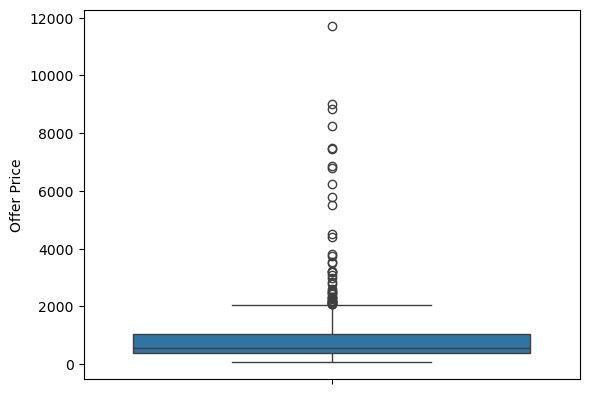

In [12]:
sns.boxplot(data["Offer Price"])

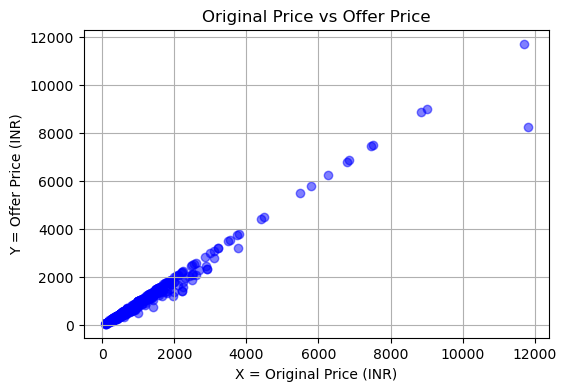

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df['Origional Price'], df['Offer Price'],alpha=0.5, color='blue')

# Title and axis labels
plt.title('Original Price vs Offer Price')
plt.xlabel('X = Original Price (INR)')
plt.ylabel('Y = Offer Price (INR)')

plt.grid(True)
plt.show()


<Axes: ylabel='Origional Price'>

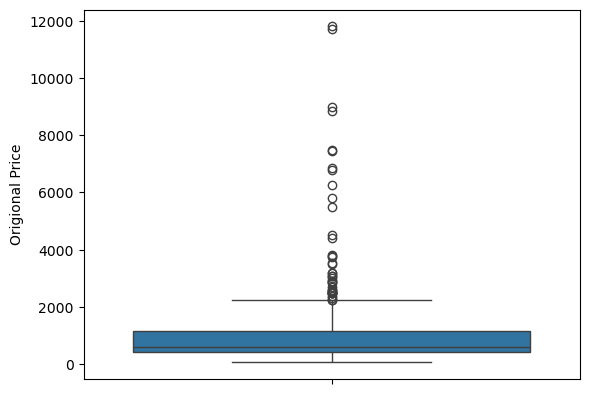

In [13]:
sns.boxplot(data["Origional Price"])

In [14]:
df[df["Origional Price"]>10000]

,Product Name,Origional Price,Offer Price,Offer_Tags,Offer,Reviews
85,Estee Lauder Revitalizing Supreme+ Youth Power...,11700.0,11700,AD,0% Off,1582
396,Lancome Genifique Ultimate Skin Repair Serum W...,11800.0,8260,GENERAL,30% Off,1358


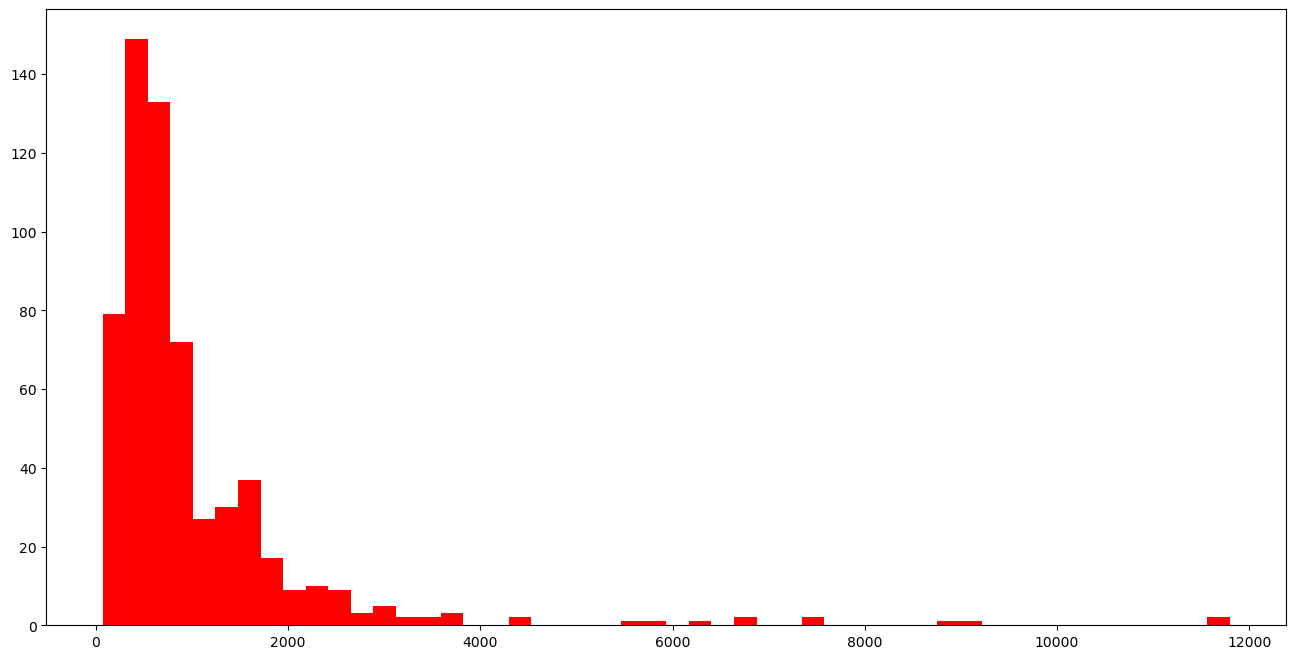

In [15]:
plt.figure(figsize = (16,8))
plt.hist(data = df, x = 'Origional Price',bins=50, color = 'Red');

<Axes: xlabel='Origional Price', ylabel='Count'>

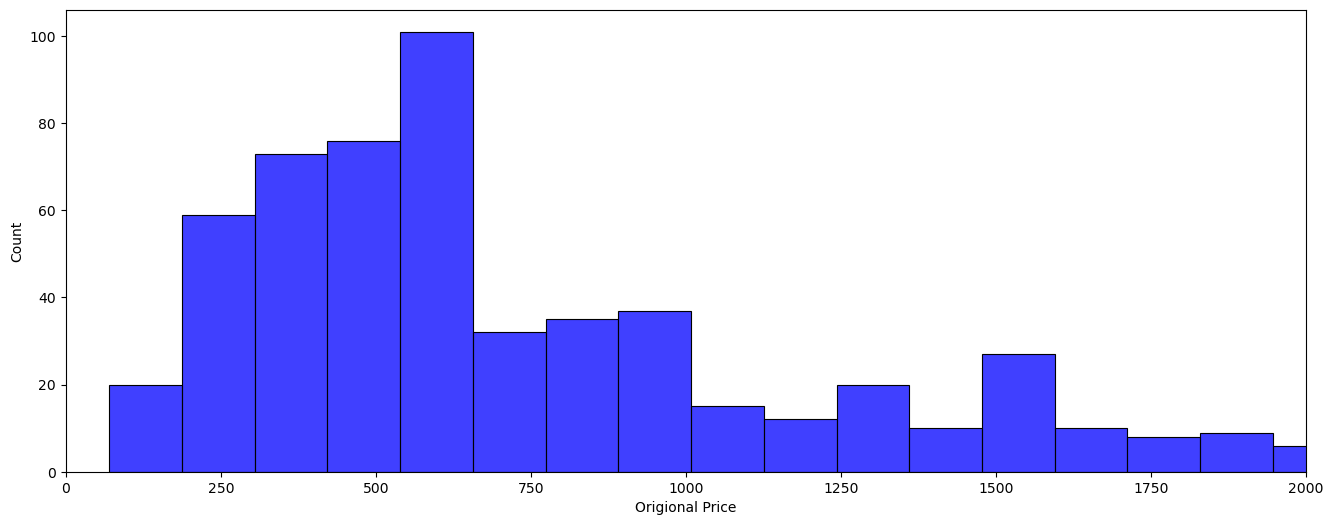

In [16]:
plt.figure(figsize = (16,6))
g = sns.histplot(data = df, x = 'Origional Price', bins = 100,color = 'Blue')
g.set(xlim = (0,2000))
g

C:\Users\malat\AppData\Local\Temp\ipykernel_21768\2399526046.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=gift.index,x = gift,palette='rainbow');


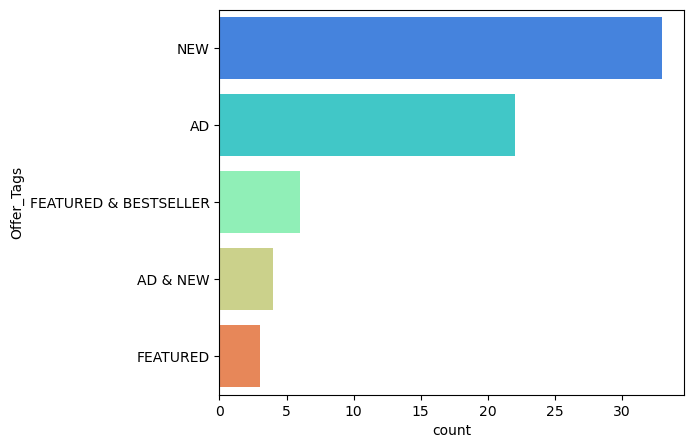

In [13]:
gift = df.value_counts('Offer_Tags').sort_values(ascending=False)
plt.figure(figsize = (6,5))
sns.barplot(y=gift.index,x = gift,palette='rainbow');

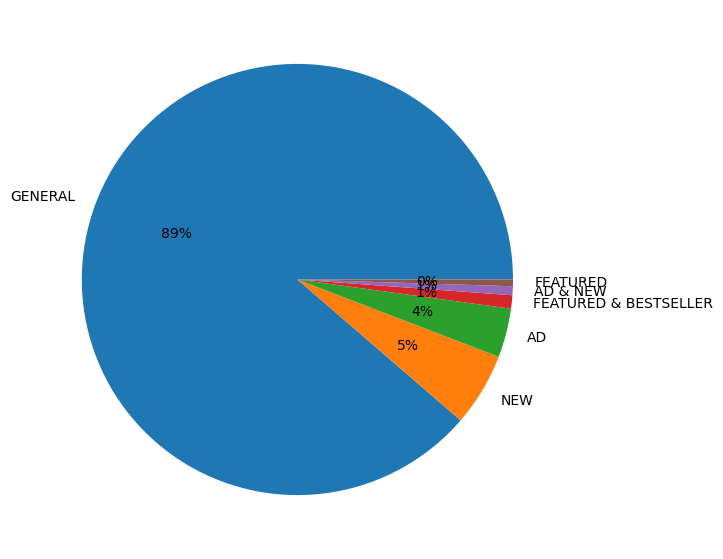

In [19]:
g = df['Offer_Tags'].value_counts().head(8)
plt.figure(figsize = (7,7))
plt.pie(x = g, data = df,labels = g.index,autopct='%.0f%%')
plt.show()

<Axes: xlabel='count', ylabel='Offer'>

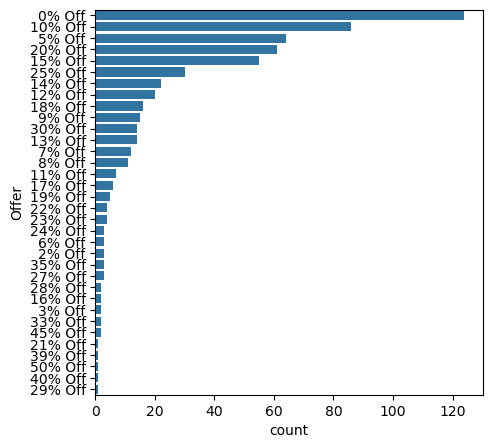

In [12]:
a = df.value_counts('Offer').sort_values(ascending=False)
plt.figure(figsize = (5,5))
sns.barplot(y=a.index,x=a)

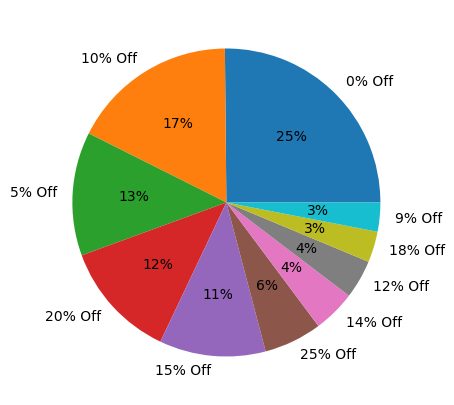

In [11]:
offer = df['Offer'].value_counts().head(10)
plt.figure(figsize = (5,5))
plt.pie(x = offer, data = df,labels = offer.index,autopct='%.0f%%')
plt.show()

C:\Users\malat\AppData\Local\Temp\ipykernel_21768\1109246643.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Offer_Tags',y='Offer Price',data= df,palette='rainbow')


Text(0.5, 1.0, 'Offer price of Product by Gift')

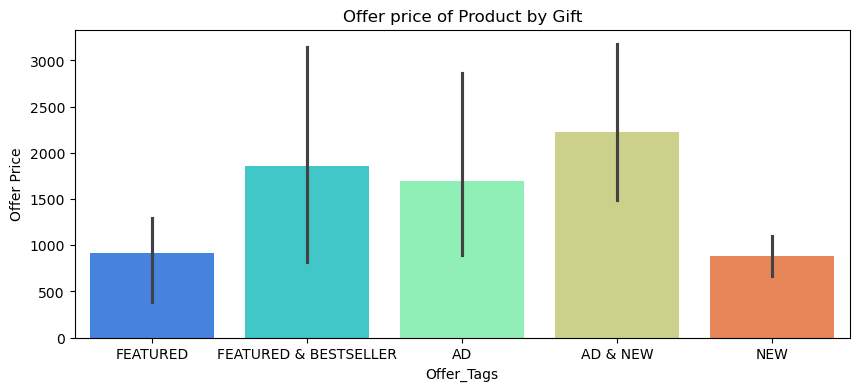

In [10]:
plt.figure(figsize=(10,4))
sns.barplot(x='Offer_Tags',y='Offer Price',data= df,palette='rainbow')
plt.title('Offer price of Product by Gift')

In [8]:
import seaborn as sns